In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Uploading the dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [15]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## **Data Cleaning and Preprocessing**

In [17]:
# Drop 'id' and 'Unnamed: 32' columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Encode the target variable: M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [18]:
df['diagnosis'].value_counts()


,count
diagnosis,
0,357
1,212


## **Splitting the Data and Standardizing features**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## **Building and Training the Logistic Regression Model**

In [20]:
from sklearn.linear_model import LogisticRegression
# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

## **Model Evaluation**

In [21]:
#Predict on the Test Set
y_pred = model.predict(X_test)

In [22]:
#Confusion Matrix, Accuracy, Precision, Recall, F1-Score

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Confusion Matrix:
 [[70  1]
 [ 2 41]]
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412


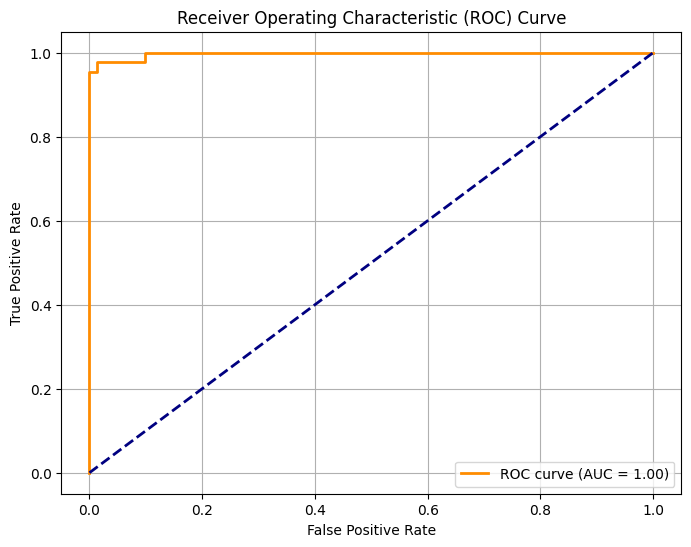

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [24]:
from sklearn.metrics import classification_report
# Set a custom threshold
threshold = 0.4

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Apply threshold
y_pred_custom = (y_proba >= threshold).astype(int)

# Evaluate with new threshold
from sklearn.metrics import classification_report

print(f"Classification Report (Threshold = {threshold}):\n")
print(classification_report(y_test, y_pred_custom))

Classification Report (Threshold = 0.4):

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## **Sigmoid Function**
The sigmoid function is used in logistic regression to map real-valued input into a range between 0 and 1, making it suitable for probability estimation in binary classification.

 {Sigmoid}(z) = 1/(1 + e^(-z))

It helps the model interpret output as the probability of the positive class, and based on a threshold (usually 0.5), the model makes a final classification.

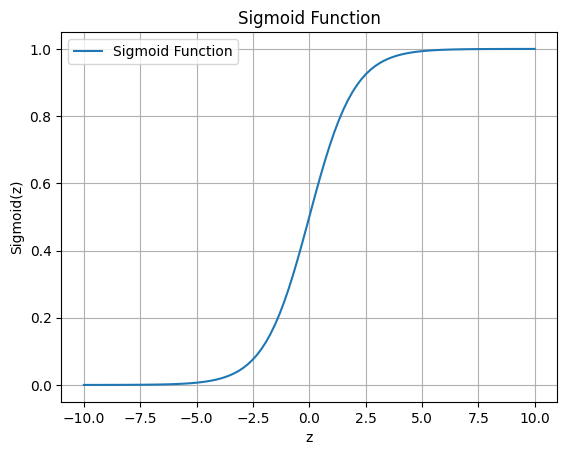

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values to visualize the function
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

# Plot the sigmoid curve
plt.plot(z, sigmoid_values, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.grid(True)
plt.legend()
plt.show()